# Guided Project: Clean And Analyze Employee Exit Surveys
In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We'll play the role of data analyst and pretend our stakeholders want to know the following:

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

 - ID: An id used to identify the participant of the survey
 - SeparationType: The reason why the person's employment ended
 - Cease Date: The year or month the person's employment ended
 - DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

 - Record ID: An id used to identify the participant of the survey
 - Reason for ceasing employment: The reason why the person's employment ended
 - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## 1. Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### 1.1 Dete Survey

Let's start analizing the names of the columns in the DETE SURVEY, in order to see which ones we could be interested in:

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Taking a look on the questions we would like to answer, we could be interested in the following columns:
 - SeparationType: to know what reasons guided the separation.
 - Role Start Date & Cease Date: in order to know if the employee could be grouped in short or long period of time working.
 - Position, Classification and Business Unit: to know if the employee have worked for an institute in that period of time.
 - From Interprsonal conflicts to Workload columns (12:27): where the employee answer with True or False to possible reasons of the activity cease.
 - From Professional Development to Health & Safety columns (28:49): where the employee grades those aspects with: 
    - Strongly Disagree = SD
    - Disagree = D
    - Neutral = N
    - Agree = A
    - Strongly Agree = SA
- Age: ranges of age, essential for answering the second question

In [4]:
dete_survey.head()

ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  ...  Kept informed  Wellness programs  \
0  Permanent Full-time  ...              N                  N   
1  Permanent Full-time  ...              N                  N   
2  Permanent Full-time  ...              N                  N   
3  Permanent Full-time  ...              A                  N   
4  Permanent Full-time  ...              N                  A   

   Health & Safety  Gender          Age  Aboriginal  Torres Strait  South Sea  \
0                N    Male        56-60         NaN            NaN        NaN   
1                N    Male        56-60         NaN            NaN        NaN   
2                N    Male  61 or older         NaN            NaN        NaN   
3                A  Female        36-40         NaN            NaN        NaN   
4                M  Female  61 or older         NaN            NaN        NaN   

   Disability  NESB  
0         NaN   Yes  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  

[5 rows x 56 columns]

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Searching for missing values on the columns we are interested in, we find that out of 822 rows:
- 5 rows are missing its Position 
- 367 are missing its Classification 
- 696 its Bussiness Unit
- Some of the graded aspects are missed, between the 87 of Oportunities for promotion and the 5 of Physical environment
- 11 rows are missing its age values 

Let's analyze the Classification column, as it will tell us if the employee has worked for an institute or not. Let's also see the values for the Position and Business Unit, in order to see if those columns could give us a clue to complete the missing values in classification.

### SeparationType
Let's check if there are some anomalies in this column

In [6]:
dete_survey['SeparationType'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

Although there are no NaN results, there are 49 rows where the separation type as been stated as 'Other'. This could be treated as some kind of lack of information, but as each of the employees have pass the survey where they had to explain the reasons more in depth, we can obviate this kind of missing values.

As we want to know if employees have left their jobs due to some kind of dissatisfactions, we should focus on those rows where the SeparationType columns says Resignation-Other reasons, Other employer and Move overseas/interstate, Voluntary Early Retirement, Ill Health Retirement, Other and Termination, as these causes could be given by some kind of discomfort. Age Retirement or Contract Expired both do not seem like given by dissagreements but by legal reasons.

### Role Start Date & Cease Date

In [7]:
dete_survey['Role Start Date'].value_counts(dropna=False)

Not Stated    98
2012          65
2011          57
2010          46
2008          45
2013          41
2007          41
2009          38
2006          25
2004          22
2003          20
2000          20
2005          20
1996          19
1999          19
1989          18
1992          17
2002          16
2001          15
1998          15
1988          14
1995          13
1997          13
1975          12
1990          12
1986          11
1976           9
1978           9
1993           9
1991           8
1979           7
1994           7
1985           6
1987           5
1981           5
1983           5
1984           4
1982           4
1980           3
1977           2
1970           2
200            1
1974           1
1973           1
1971           1
1972           1
Name: Role Start Date, dtype: int64

In [8]:
dete_survey['Cease Date'].value_counts(dropna=False)

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
04/2013         2
07/2014         2
08/2012         2
04/2014         2
07/2012         1
07/2006         1
09/2010         1
2014            1
09/2014         1
2010            1
11/2012         1
Name: Cease Date, dtype: int64

There are 98 rows in which the column 'Role Start Date' appears as 'Not Stated', and one where the value is 200, which is not a year within the possible range we are handling here. On the other hand, there are 34 not stated row with the column 'Cease Date'. For those rows, we will not be able to calculate the lenght of the period those employees had been working for their institute.

### Position, Classification and Business Unit

In [9]:
dete_survey['Classification'].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

As we can see, there are 124 people who have worked in Secondary Education. We cannot say for sure which ones of the rest of categories fit with Institute Teachers.

In [10]:
dete_survey['Position'].value_counts(dropna=False)

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
NaN                                                          5
Business Service Manager                                     4
Deputy Principal                                       

There are no clues on the categories above that tell us whether the positions have been developed on an Institute or University. It is true that some of them have the word 'School' on them. 

In [11]:
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Infrastructure                                  2
Policy, Research, Legislation                   2
Calliope State School                           1
Pacific Pines SHS                               1
Finance                                         1
Corporate Procurement                           1
Indigenous Education and Training Futures       1
Name: Business Unit, dtype: int64

Given this column, we could not tell whether those employees have worked on an Institute or not.

### From Interpersonal conflicts to Workload columns (12:27)

In [12]:
separation_survey = dete_survey.iloc[:,12:28]
separation_survey_T = separation_survey.apply(lambda x: x.value_counts(dropna=False)).T
separation_survey_T

False  True 
Interpersonal conflicts                788     34
Job dissatisfaction                    733     89
Dissatisfaction with the department    761     61
Physical work environment              806     16
Lack of recognition                    765     57
Lack of job security                   794     28
Work location                          795     27
Employment conditions                  788     34
Maternity/family                       760     62
Relocation                             754     68
Study/Travel                           785     37
Ill Health                             710    112
Traumatic incident                     794     28
Work life balance                      605    217
Workload                               735     87
None of the above                      605    217

We should choose those rows where the employee had marked as True columns such as Interpersonal conflicts, Job dissatisfaction, Dissatisfaction with the department, Physical work environment, Lack of recognition, Lack of job security, Work location, Employment conditions, Relocation (if they mark just this one we should go more in depth to see if the relocation had been asked for some kind of dissatisfaction), Traumatic incident, Work life balance (if they mark just this one we should go more in depth to see if the relocation had been asked for some kind of dissatisfaction), Workload, None of the above (if they mark just this one we should go more in depth to see if the relocation had been asked for some kind of dissatisfaction).

### From Professional Development to Health & Safety columns (28:49)

Let's see how many rows are fully completed

In [13]:
survey = dete_survey.iloc[:,28:49]
full_survey = survey.dropna().shape[0]
full_survey_perc = round(full_survey / survey.shape[0], 2)
print("There are {} rows where the survey had been fully completed, which means a {} of the total rows".format(full_survey, full_survey_perc))

There are 643 rows where the survey had been fully completed, which means a 0.78 of the total rows


<AxesSubplot:ylabel='ID'>

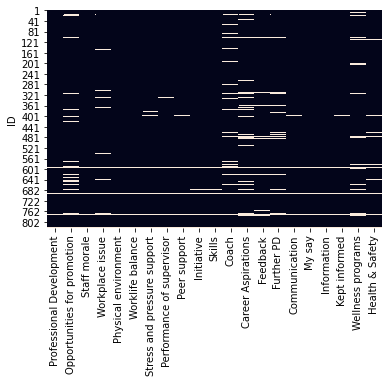

In [14]:
survey['ID'] = dete_survey['ID']
survey_update = survey.set_index('ID')
sns.heatmap(survey_update.isnull(), cbar=False)

### Age

Let's check how are the values distributed in this column:

In [15]:
dete_survey['Age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

<AxesSubplot:>

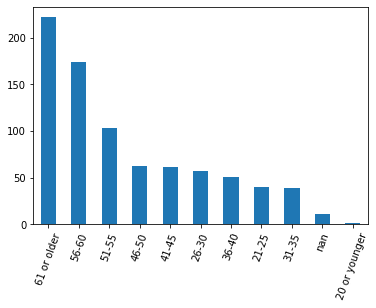

In [16]:
dete_survey['Age'].value_counts(dropna=False).plot(kind='bar', rot=70)

As we can see the ages are distributed by ranges of five years, from 20 or younger to 61 or older. More than 75% of the employees were on the range between 40 and more than 60 years old, with just 11 unvalid rows.

### 1.2 Tafe Survey

Time to analyze the results of TAFE SURVEY:

In [17]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Based on the questions we are trying to answer, we could be interested in:
 - LengthofServiceOverall: the lenght of service at the actual Institute
 - Reason for ceasing employment
 - Contributing factors: there are 11 different factors, and the employee chooses among them. We should choose those who have marked the factors related with some kind of dissatisfaction: 
    - Dissatisfaction
    - Job Dissatisfaction
    - Interpersonal Conflict
    - Other
 -  Institute views and Work unit views: 30 questions about the institute and the workplace, graded with:
    - Strongly Disagree = SD
    - Disagree = D
    - Neutral = N
    - Agree = A
    - Strongly Agree = SA
    - Not Applicable
 - Workplace. Topic:Would you recommend the Institute as an employer to others?: question with a 'yes/no' answer. This could be used as a clear measure of satisfaction or dissatisfaction from the employee regarding the Institute.
 - CurrentAge. Current Age: ranges of ages. 

In [18]:
tafe_survey.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            
3                                                Yes                                                            
4                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               
3                                                Yes                                               
4                                                Yes                                               

  Workplace. Topic:Does your workplace value the diversity of its employees?  \
0                                                Yes                           
1                                                Yes                           
2                                                Yes                           
3                                              

Let's now analyze the columns we could use, in order to check how they are arranged and how many missing values they have:

### Lenght of service overall

In [19]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False)

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

The lenght of service has been grouped by ranges of years: Less than 1, 1-2, 3-4, 5-6, 7-10, 11-20, More than 20. There are 106 missing values.

### Reason for ceasing employment

In [20]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In order to answer the questions we are aiming, we should take those rows where the reason is either Resignation, Transfer or Termination.

### Contributing factors

In [21]:
factors_df = tafe_survey[['Contributing Factors. Dissatisfaction', 
                          'Contributing Factors. Job Dissatisfaction', 
                          'Contributing Factors. Interpersonal Conflict', 
                          'Contributing Factors. Other']]
factors_df.dropna(how='all', inplace=True)
print('There are {} employees that have pointed at least one of the factors related with some kind of dissatisfaction.'.format(factors_df.shape[0]))

There are 437 employees that have pointed at least one of the factors related with some kind of dissatisfaction.


### Institute views and Work unit views

In [22]:
views_survey = tafe_survey.iloc[:,18:48]
views_survey_full = views_survey.dropna().shape[0]
vs_full_percent = round(views_survey_full/views_survey.shape[0], 2)
print('There are {} rows where the Institute Views and Work Unit Views survey had been fully completed, which means {} of the total of rows'.format(views_survey_full, vs_full_percent))

There are 521 rows where the Institute Views and Work Unit Views survey had been fully completed, which means 0.74 of the total of rows


### Would you recommend the Institute as an employer to others?

In [23]:
tafe_survey['Workplace. Topic:Would you recommend the Institute as an employer to others?'].value_counts(dropna=False)

Yes    416
No     165
NaN    121
Name: Workplace. Topic:Would you recommend the Institute as an employer to others?, dtype: int64

As we can see, there are just 165 people who would not recommend the Institute they used to work in as a place for others to work in; which confronts with the number of employees who had pointed as contributing factors for them to leave the job at least one of those that mean some kind of dissatisfaction. This could tell us that maybe this column's information will not be that important when pointing those employees who had left the institute because of some kind of dissatisfaction. At least it could reasure it, so we will keep it anyway.

### Age

In [24]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

The ages of the employees are distributed by ranges of 5 years, from 20 or younger to 56 or older. There are 106 unknown rows.

<AxesSubplot:>

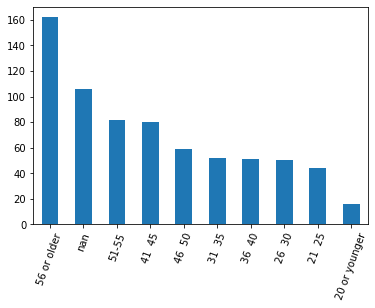

In [25]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna=False).plot(kind='bar', rot=70)

As we can see, more than half of the employees were 40 or older when they left their jobs, whilst few more than 200 were 40 or younger.

## 2. Standarizing dataframes

In order to unify both dataframes, we need to clean and standarize some of the columns, so we can analize the data as one afterwards. Let's do it step by step:

### 2.1 Lenght of service

As for answering one of the questions we need to know for how long the employees had been working for the institute, we should have this data for each of the columns. After checking both dataframes in the previous step, we realized that each of them show this data in a different way: 
 - The DETE Survey has a column for the role start date and another one for the cease date 
- The TAFE Survey have just one column showing the lenght of the service with intervals: less than 1 year, 1-2, 3-4, 5-6, 7-10, 11-20, More than 20 years

As the TAFE dataframe has the crudest data of both, we will follow its way for this column. Let's begin by modifying the column in the TAFE dataframe: change its name for 'service_lenght', and convert all the ranges from string format to 'pandas.Interval()' one.

In [26]:
tafe_survey.rename(columns={'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'service_lenght'}, inplace=True)

In [27]:
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == 'Less than 1 year'] = pd.Interval(0,1, closed='neither')
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == '1-2'] = pd.Interval(1,3, closed='left')
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == '3-4'] = pd.Interval(3,5, closed='left')
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == '5-6'] = pd.Interval(5,7, closed='left')
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == '7-10'] = pd.Interval(7,11, closed='left') 
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == '11-20'] = pd.Interval(11,21, closed='left')
tafe_survey['service_lenght'].loc[tafe_survey['service_lenght'] == 'More than 20 years'] = pd.Interval(21,100, closed='left')

tafe_survey['service_lenght'].value_counts(dropna=False)

(0, 1)       147
NaN          106
[1, 3)       102
[3, 5)        96
[11, 21)      89
[21, 100)     71
[5, 7)        48
[7, 11)       43
Name: service_lenght, dtype: int64

Once the TAFE dataframe has been modified we can jump into the DETE dataframe. In this case the lenght of the services is given by two columns: one with the 'Role Start Date' (giving just the year) and another one with the 'Cease Date' (giving month/year). This makes our duty a bit more difficult, as we need to take just the year of each of the columns, make the arythmetic and then group the result by the same intervals of the TAFE dataframe. We also need to consider that some of the values in both columns appear as 'Not Stated'. Let's start with the later perform.

As we will need to subtract the 'Role Start Date' from the 'Cease Date' in order to get the lenght of the service of each employee, we will get an error as long as we try to subtract, for example, a string from a number or vice versa. So, one posssible solution could be convert all those 'Not Stated' dates to NaN values, so if we use them together with numbers the result will not be an error, but another NaN (something right as there is no way of knowing the lenght of service of that employee).

In [28]:
dete_survey['Cease Date'].loc[dete_survey['Cease Date'] == 'Not Stated'] = np.nan
dete_survey['Role Start Date'].loc[dete_survey['Role Start Date'] == 'Not Stated'] = np.nan

Once we got all the 'Not Stated' values as NaN, we should get all the years from the 'Cease Date' column, as some of the values have a format 'month/year' and we won't use the month data. 

In [29]:
cease_date_df = dete_survey['Cease Date'].str.split('/', expand=True)
cease_date_df.loc[cease_date_df[1].isnull(), 1] = cease_date_df[0]

dete_survey['Cease Date'] = cease_date_df[1]

Although both columns have now just the year as data, they still have an object format, not a numeric one, so Python will not allow us to perform any arythmetic operation. We need to convert both to a numeric format, and as some of the values in both are NaN, the best format will be 'float32', as it allow the program to do some arythmetic between numbers and NaN values. Let's do the subtraction and store the result in a new column, called 'service_lenght_n'.

In [30]:
dete_survey[['Cease Date', 'Role Start Date']] = dete_survey[['Cease Date', 'Role Start Date']].astype('float32', copy=False)
dete_survey['service_lenght_n'] = dete_survey['Cease Date'] - dete_survey['Role Start Date']

Now we have the lenght of the service of each employee in years, stored in the 'service_lenght_n' column. We are ready to group all of them in the same intervals as in the TAFE dataframe. We can do this by creating a new empty column ('service_lenght'), and using the .loc function to point each of the rows with its right interval using the 'Interval()' function from Pandas.

In [31]:
dete_survey['service_lenght'] = ''

In [32]:
dete_survey['service_lenght'].loc[dete_survey['service_lenght_n'] == 0] = pd.Interval(0,1, closed='neither')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 0) & (dete_survey['service_lenght_n'] < 3)] = pd.Interval(1,3, closed='left')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 2) & (dete_survey['service_lenght_n'] < 5)] = pd.Interval(3,5, closed='left')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 4) & (dete_survey['service_lenght_n'] < 7)] = pd.Interval(5,7, closed='left')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 6) & (dete_survey['service_lenght_n'] < 11)] = pd.Interval(7,11, closed='left')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 10) & (dete_survey['service_lenght_n'] < 21)] = pd.Interval(11,21, closed='left')
dete_survey['service_lenght'].loc[(dete_survey['service_lenght_n'] > 20) & (dete_survey['service_lenght_n'] < 100)] = pd.Interval(21,100, closed='left')
dete_survey['service_lenght'].loc[dete_survey['service_lenght'] == ''] = np.nan

In [33]:
dete_survey['service_lenght'].value_counts(dropna=False)

[11, 21)     145
[21, 100)    144
NaN          127
[1, 3)       110
[3, 5)        89
[7, 11)       80
(0, 1)        65
[5, 7)        62
Name: service_lenght, dtype: int64

As we can see, all the rows are now standarized as in the other dataframe, and ready to be merged together.

## 2.2 Age

In its Age columns, both dataframes show the ages of the employees the same way: by intervals of five years. The only difference is that the TAFE dataframe stops in 56 or older, whilst the DETE dataframe does i in 61 or older. In order to standarize this, we should first include in an interval of greater than 56 those employees of the DETE Survey who are in the '56-60' and the '61 or older' groups. And of course change the format of the intervals from string to pandas.Interval() format. Let's start with the DETE survey dataframe.

In [34]:
dete_survey['Age'].loc[dete_survey['Age'] == '20 or younger'] = pd.Interval(0, 20, closed='right')
dete_survey['Age'].loc[dete_survey['Age'] == '21-25'] = pd.Interval(21, 26, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '26-30'] = pd.Interval(26, 31, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '31-35'] = pd.Interval(31, 36, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '36-40'] = pd.Interval(36, 41, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '41-45'] = pd.Interval(41, 46, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '46-50'] = pd.Interval(46, 51, closed='left')
dete_survey['Age'].loc[dete_survey['Age'] == '51-55'] = pd.Interval(51, 56, closed='left')
dete_survey['Age'].loc[(dete_survey['Age'] == '56-60') | (dete_survey['Age'] == '61 or older')] = pd.Interval(56, 100, closed='left')

In [35]:
dete_survey['Age'].value_counts(dropna=False)

[56, 100)    396
[51, 56)     103
[46, 51)      63
[41, 46)      61
[26, 31)      57
[36, 41)      51
[21, 26)      40
[31, 36)      39
NaN           11
(0, 20]        1
Name: Age, dtype: int64

There is also some job to do on the TAFE dataframe. First of all, we should change the name of the column, from 'CurrentAge. Current Age' to just 'Age'. Afterwards, we also need to change the format of the intervals, as we have done in the DETE dataframe.

In [36]:
tafe_survey.rename(columns={'CurrentAge. Current Age': 'Age'}, inplace=True)

In [37]:
tafe_survey['Age'].loc[tafe_survey['Age'] == '56 or older'] = pd.Interval(56, 100, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '51-55'] = pd.Interval(51, 56, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '46  50'] = pd.Interval(46, 51, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '41  45'] = pd.Interval(41, 46, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '36  40'] = pd.Interval(36, 41, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '31  35'] = pd.Interval(31, 36, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '26  30'] = pd.Interval(26, 31, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '21  25'] = pd.Interval(21, 26, closed='left')
tafe_survey['Age'].loc[tafe_survey['Age'] == '20 or younger'] = pd.Interval(0, 20, closed='right')

In [38]:
tafe_survey['Age'].value_counts(dropna=False)

[56, 100)    162
NaN          106
[51, 56)      82
[41, 46)      80
[46, 51)      59
[31, 36)      52
[36, 41)      51
[26, 31)      50
[21, 26)      44
(0, 20]       16
Name: Age, dtype: int64

Both columns are now standarized and ready to be merged.

## 2.3 Surveys

Let's now take a look on those columns that show the results of the surveys the employees have to fill in the moment they leave, grading different aspects of the institute such as professional development, healt & safety, work views, etc on a scale with Strongly Agree, Agree, Neutral, Disagree or Strongly Disagree. 

As both dataframes have this kind of surveys inside, with similar questions, a way of standarizing them is transforming the grades to numbers (from 5 being Strongly Agree to 1 being Strongly Disagree) and then extract the mean of this grades in a new column called 'agreement_level'. This way we can measure the level of agreement/disagreement of each employee with their institute, and reassert satisfaction or dissatisfaction. We could start with the DETE dataframe.

In [39]:
for c in list(dete_survey.iloc[:,28:49].columns):
    dete_survey[c].loc[dete_survey[c] == 'SA'] = 5.0
    dete_survey[c].loc[dete_survey[c] == 'A'] = 4.0
    dete_survey[c].loc[dete_survey[c] == 'N'] = 3.0
    dete_survey[c].loc[dete_survey[c] == 'D'] = 2.0
    dete_survey[c].loc[dete_survey[c] == 'SD'] = 1.0
    dete_survey[c].loc[dete_survey[c] == 'M'] = np.nan

In [40]:
dete_survey['agreement_level'] = round(dete_survey.iloc[:,28:49].sum(axis=1) / dete_survey.iloc[:,28:49].count(axis='columns'), 2)

Same process with the TAFE dataset

In [41]:
for c in list(tafe_survey.iloc[:,18:48].columns):
    tafe_survey[c].loc[tafe_survey[c] == 'Strongly Agree'] = 5.0
    tafe_survey[c].loc[tafe_survey[c] == 'Agree'] = 4.0
    tafe_survey[c].loc[tafe_survey[c] == 'Neutral'] = 3.0
    tafe_survey[c].loc[tafe_survey[c] == 'Disagree'] = 2.0
    tafe_survey[c].loc[tafe_survey[c] == 'Strongly Disagree'] = 1.0
    tafe_survey[c].loc[tafe_survey[c] == 'Not Applicable'] = np.nan

In [42]:
tafe_survey['agreement_level'] = round(tafe_survey.iloc[:,18:48].sum(axis=1) / tafe_survey.iloc[:,18:48].count(axis='columns'), 2)

Now both columns are standarized and ready to be merged.

## 2.4 SeparationType and Reason for ceasing employment

Taking a look at both columns, we can see that some of the types/reasons have been named the same (Contract Expired or Termination); some refer to the same types/reasons, but had been named in a different way (Resignation or Retirement are more specified in the DETE survey than in the TAFE one); and some others have no relative at all (Retrenchment/ Redundancy and Transfer in the TAFE survey).

In order to standarize both columns, we should first rename both as 'reason_of_cease'. Once this is done, standarize the types in the DETE survey (all the Resignations become just 'Resignation'; all the Retirements become 'Retirement'). Ultimately, we just keep the types that have no relatives between the columns, so they can be also used once both dataframes are merged.

In [43]:
dete_survey.rename(columns={'SeparationType': 'reason_of_cease'}, inplace=True)
tafe_survey.rename(columns={'Reason for ceasing employment': 'reason_of_cease'}, inplace=True)

In [44]:
dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Resignation-Other reasons'] = 'Resignation'
dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Resignation-Other employer'] = 'Resignation'
dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Resignation-Move overseas/interstate'] = 'Resignation'

dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Age Retirement'] = 'Retirement'
dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Voluntary Early Retirement (VER)'] = 'Retirement'
dete_survey['reason_of_cease'].loc[dete_survey['reason_of_cease'] == 'Ill Health Retirement'] = 'Retirement'

In [45]:
dete_survey['reason_of_cease'].value_counts(dropna=False)

Retirement          413
Resignation         311
Other                49
Contract Expired     34
Termination          15
Name: reason_of_cease, dtype: int64

In [46]:
tafe_survey['reason_of_cease'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: reason_of_cease, dtype: int64

Both columns are ready to be merged.

## 2.5 Contributing factors & from Interpersonal conflicts to Worload columns

Part of both surveys was for the employees to point specifically the reason or reasons why they were leaving their positions. As those columns are not standarized for both dataframes, and in some cases do not point a possible real dissatisfaction, is better if we select for each of them the columns which point a dissatisfaction, and count how many columns each employee had signed, saving this number on a new column called 'dissatisfactions'. As we do not need to know the kind of dissatisfaction, but if there are any, this will be enough for our project.

For the DETE survey we have 13 columns that point dissatisfactions. For each row, those columns are marked with boolean values, so we only need to select the columns and sum all the values for each of the rows. The outcome will be saved in the new column.

In [47]:
dissatisfaction_cols = ['Interpersonal conflicts', 'Job dissatisfaction',
       'Dissatisfaction with the department', 'Physical work environment',
       'Lack of recognition', 'Lack of job security', 'Work location',
       'Employment conditions', 'Relocation', 'Traumatic incident', 'Work life balance',
       'Workload', 'None of the above']

dete_survey['dissatisfactions'] = dete_survey[dissatisfaction_cols].sum(axis=1)

We can follow the same process for the TAFE survey, which has only 4 columns that point dissatisfactions. Those are marked either with the name of the column, a hyphen '-' or a NaN value. We can conclude that those marked with the hyphen mean that there are no dissatisfactions, so we will transform them to null values, so we can perform a sum of non-null values afterwards. The outcome will be saved in the new column.

In [48]:
dissatisfaction_cols = ['Contributing Factors. Dissatisfaction', 
                          'Contributing Factors. Job Dissatisfaction', 
                          'Contributing Factors. Interpersonal Conflict', 
                          'Contributing Factors. Other']

for c in dissatisfaction_cols:
    tafe_survey[c].loc[tafe_survey[c] == '-'] = np.nan

tafe_survey['dissatisfactions'] = tafe_survey[dissatisfaction_cols].notnull().sum(axis=1)

Now both columns are ready to be merged.

## 3. Selecting the columns and concatenating the dataframes

Once both dataframes have been standarized is the moment of joining them in a unique frame, so we can analyze, visualize and extract conclussions. Let's see first how both dataframes come up after choosing just the columns that we are interested in

In [49]:
dete_survey_final = dete_survey[['Age', 'service_lenght', 'reason_of_cease', 'dissatisfactions', 'agreement_level']]
dete_survey_final

Age service_lenght reason_of_cease  dissatisfactions  \
0    [56, 100)        [7, 11)      Retirement                 3   
1    [56, 100)            NaN      Retirement                 0   
2    [56, 100)         [1, 3)      Retirement                 1   
3     [36, 41)         [5, 7)     Resignation                 0   
4    [56, 100)      [21, 100)      Retirement                 1   
..         ...            ...             ...               ...   
817  [56, 100)       [11, 21)      Retirement                 1   
818   [51, 56)      [21, 100)      Retirement                 1   
819   [31, 36)         [5, 7)     Resignation                 2   
820   [41, 46)         [3, 5)      Retirement                 0   
821        NaN            NaN     Resignation                 0   

     agreement_level  
0               3.52  
1               3.48  
2               3.10  
3               3.71  
4               3.50  
..               ...  
817             3.52  
818             3.38  
819             3.81  
820             2.57  
821              NaN  

[822 rows x 5 columns]

In [50]:
tafe_survey_final = tafe_survey[['Age', 'service_lenght', 'reason_of_cease', 'dissatisfactions', 'agreement_level']]
tafe_survey_final

Age service_lenght   reason_of_cease  dissatisfactions  \
0    [26, 31)         [1, 3)  Contract Expired                 0   
1         NaN            NaN        Retirement                 0   
2         NaN            NaN        Retirement                 0   
3         NaN            NaN       Resignation                 0   
4    [41, 46)         [3, 5)       Resignation                 0   
..        ...            ...               ...               ...   
697  [51, 56)         [1, 3)       Resignation                 0   
698       NaN            NaN       Resignation                 0   
699  [51, 56)         [5, 7)       Resignation                 1   
700  [41, 46)         [1, 3)  Contract Expired                 0   
701  [26, 31)         [3, 5)       Resignation                 0   

     agreement_level  
0               3.97  
1               4.30  
2               4.03  
3               4.57  
4               4.83  
..               ...  
697             3.67  
698              NaN  
699             4.20  
700             3.03  
701             4.70  

[702 rows x 5 columns]

After all the job, we ended up with two dataframes from two completely different sources, that compile all the information we are interested in in just 5 standarized columns. Let's concatenate both

In [51]:
survey_data = pd.concat([dete_survey_final, tafe_survey_final], ignore_index=True)
survey_data

Age service_lenght   reason_of_cease  dissatisfactions  \
0     [56, 100)        [7, 11)        Retirement                 3   
1     [56, 100)            NaN        Retirement                 0   
2     [56, 100)         [1, 3)        Retirement                 1   
3      [36, 41)         [5, 7)       Resignation                 0   
4     [56, 100)      [21, 100)        Retirement                 1   
...         ...            ...               ...               ...   
1519   [51, 56)         [1, 3)       Resignation                 0   
1520        NaN            NaN       Resignation                 0   
1521   [51, 56)         [5, 7)       Resignation                 1   
1522   [41, 46)         [1, 3)  Contract Expired                 0   
1523   [26, 31)         [3, 5)       Resignation                 0   

      agreement_level  
0                3.52  
1                3.48  
2                3.10  
3                3.71  
4                3.50  
...               ...  
1519             3.67  
1520              NaN  
1521             4.20  
1522             3.03  
1523             4.70  

[1524 rows x 5 columns]

In [52]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1407 non-null   object 
 1   service_lenght    1291 non-null   object 
 2   reason_of_cease   1523 non-null   object 
 3   dissatisfactions  1524 non-null   int64  
 4   agreement_level   1429 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 59.7+ KB


In [53]:
survey_data.isnull().any(axis=1).sum()

242

In [54]:
survey_data['Age'].value_counts(dropna=False)

[56, 100)    558
[51, 56)     185
[41, 46)     141
[46, 51)     122
NaN          117
[26, 31)     107
[36, 41)     102
[31, 36)      91
[21, 26)      84
(0, 20]       17
Name: Age, dtype: int64

In [55]:
survey_data['service_lenght'].value_counts(dropna=False)

[11, 21)     234
NaN          233
[21, 100)    215
[1, 3)       212
(0, 1)       212
[3, 5)       185
[7, 11)      123
[5, 7)       110
Name: service_lenght, dtype: int64

In [56]:
survey_data['reason_of_cease'].value_counts(dropna=False)

Resignation                 651
Retirement                  495
Contract Expired            161
Retrenchment/ Redundancy    104
Other                        49
Termination                  38
Transfer                     25
NaN                           1
Name: reason_of_cease, dtype: int64

In [57]:
survey_data['dissatisfactions'].value_counts(dropna=False)

0    650
1    623
2    165
3     70
4     10
5      3
6      2
9      1
Name: dissatisfactions, dtype: int64

We are left with a dataframe of 1524 rows and 5 columns. Of those rows, just 242 have some null values, which means the 16% of the total. All the data is now standarized, and ready to be analyzed and showed.

## 4. Answering the questions

Let's remeber the questions we were asking ourselves in the beginning of this project:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Taking a look at the data left, we can see it has 651 employees who had resigned, 38 whose contracts had been terminated, 25 who had been transfered and 49 who had left their jobs for some other reasons. As all those reasons could entail some kind of dissatisfaction, let's select all those employees on a new dataframe.

In [58]:
resigners = survey_data.loc[((survey_data['reason_of_cease'] == 'Resignation') | (survey_data['reason_of_cease'] == 'Other') | (survey_data['reason_of_cease'] == 'Termination') | (survey_data['reason_of_cease'] == 'Transfer'))]

resigners

Age service_lenght reason_of_cease  dissatisfactions  \
3     [36, 41)         [5, 7)     Resignation                 0   
5     [41, 46)       [11, 21)     Resignation                 1   
8     [31, 36)         [3, 5)     Resignation                 0   
9     [46, 51)         [3, 5)     Resignation                 3   
11    [31, 36)         [3, 5)     Resignation                 1   
...        ...            ...             ...               ...   
1518  [21, 26)         [5, 7)     Resignation                 0   
1519  [51, 56)         [1, 3)     Resignation                 0   
1520       NaN            NaN     Resignation                 0   
1521  [51, 56)         [5, 7)     Resignation                 1   
1523  [26, 31)         [3, 5)     Resignation                 0   

      agreement_level  
3                3.71  
5                2.47  
8                2.20  
9                1.14  
11               3.00  
...               ...  
1518             3.55  
1519             3.67  
1520              NaN  
1521             4.20  
1523             4.70  

[763 rows x 5 columns]

There are 763 employees matching all those requirements. With this remaining dataframe, let's try to answer the first two questions.

### 4.1 Employees by service lenght

First of all, we should drop those rows where the service lenght is a null value, as these ones are useless for our analysis.

In [59]:
resigners_serv = resigners.loc[resigners['service_lenght'].notna()]
resigners_serv['reason_of_cease'].value_counts()

Resignation    552
Other           41
Termination     35
Transfer        20
Name: reason_of_cease, dtype: int64

We are left with 648 employees: 552 of them had resigned, 35 had terminated their contracts, 20 had been transfered and 41 left their jobs for some other reasons.

First of all, let's group all those employees by lenght of service in a new dataframe, adding the count of each group and its percentage above the total, the count of those who pointed any dissatisfaction with its percentage above the total and above the group, the dissatisfactions per capita of each group, and the mean agreement level. We can also add a row with the totals of each column at the bottom.

In [60]:
resigners_perc = pd.DataFrame(data=resigners_serv.groupby('service_lenght').size(), columns=['value_counts'])
resigners_perc['%_of_total'] = round(resigners_serv['service_lenght'].value_counts() / resigners_serv.shape[0], 2)
resigners_perc['with_dissat.'] = resigners_serv['service_lenght'].loc[resigners_serv['dissatisfactions'] != 0].value_counts()
resigners_perc['%_of_total_dissat.'] = round(resigners_perc['with_dissat.'] / resigners_perc['with_dissat.'].sum(), 2)
resigners_perc['%_with_dissat_(group)'] = round(resigners_perc['with_dissat.'] / resigners_perc['value_counts'], 2)
resigners_perc = pd.concat([resigners_perc, round(resigners_serv.groupby('service_lenght').mean(), 2)], axis=1)

In [61]:
totals_row = {'value_counts': resigners_perc['value_counts'].sum(), 
'with_dissat.': resigners_perc['with_dissat.'].sum(), 
'%_with_dissat_(group)': round(resigners_perc['with_dissat.'].sum()/resigners_perc['value_counts'].sum(), 2),
'%_of_total': resigners_perc['%_of_total'].sum(), 
'%_of_total_dissat.': resigners_perc['%_of_total_dissat.'].sum(), 
'dissatisfactions': resigners_serv['dissatisfactions'].sum(), 
'agreement_level': 5}

resigners_perc_total = pd.DataFrame(totals_row, index=['Total'])

resigners_perc_wt = pd.concat([resigners_perc, resigners_perc_total])
resigners_perc_wt

value_counts  %_of_total  with_dissat.  %_of_total_dissat.  \
(0, 1)              123        0.19            67                0.16   
[1, 3)              149        0.23            94                0.23   
[3, 5)              135        0.21            88                0.22   
[5, 7)               79        0.12            52                0.13   
[7, 11)              66        0.10            44                0.11   
[11, 21)             64        0.10            41                0.10   
[21, 100)            32        0.05            21                0.05   
Total               648        1.00           407                1.00   

           %_with_dissat_(group)  dissatisfactions  agreement_level  
(0, 1)                      0.54              0.76             3.61  
[1, 3)                      0.63              0.89             3.71  
[3, 5)                      0.65              0.96             3.55  
[5, 7)                      0.66              1.06             3.47  
[7, 11)                     0.67              0.92             3.30  
[11, 21)                    0.64              0.97             3.51  
[21, 100)                   0.66              1.19             3.42  
Total                       0.63            600.00             5.00

Let's also create a dataframe with the same data, but this time stablishing two general groups: those who worked less than 5 years and those who worked more than 5.

In [62]:
short = pd.DataFrame(resigners_perc_wt.iloc[:3,:].sum()).transpose()
short.iloc[:,4:] = round(short.iloc[:,4:]/3, 2)

long = pd.DataFrame(resigners_perc_wt.iloc[3:7,:].sum()).transpose()
long.iloc[:,4:] = round(long.iloc[:,4:]/4, 2)

general_groups = pd.concat([short,long], ignore_index=True)
general_groups.index = pd.Index([pd.Interval(0,5, closed='left'), pd.Interval(5,75, closed='left')])
general_groups

value_counts  %_of_total  with_dissat.  %_of_total_dissat.  \
[0, 5)          407.0        0.63         249.0                0.61   
[5, 75)         241.0        0.37         158.0                0.39   

         %_with_dissat_(group)  dissatisfactions  agreement_level  
[0, 5)                    0.61              0.87             3.62  
[5, 75)                   0.66              1.04             3.42

These two dataframes will be enough for us to perform the analysis plotting the results and answer the questions. First let's see how are these two general groups distributed in general (taking resigners who argued and did not argue dissatisfactions) and between people who argued dissatisfactions and people who did not.

([<matplotlib.patches.Wedge at 0x7fcd8418c2e0>,
 [Text(-0.5299291209321736, 0.9639373043865738, 'Dissat.'),
  Text(0.5299292111824945, -0.9639372547710247, 'No dissat.')],
 [Text(-0.28905224778118555, 0.5257839842108584, '66.0%'),
  Text(0.28905229700863333, -0.5257839571478315, '34.0%')])

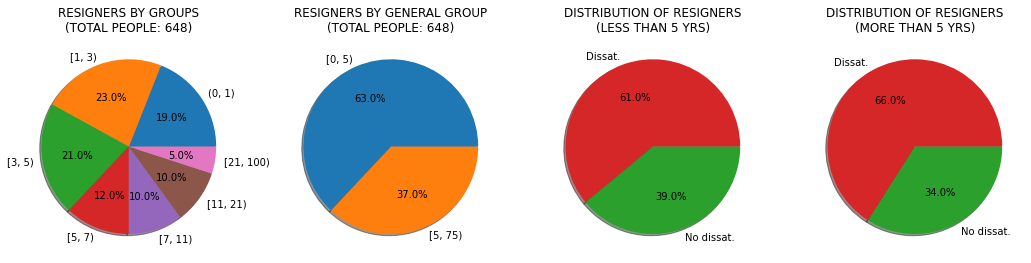

In [63]:
fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(1,4,1)
ax1.set_title('RESIGNERS BY GROUPS\n(TOTAL PEOPLE: 648)')
plt.pie(x=resigners_perc_wt['%_of_total'][:-1], labels=resigners_perc_wt.index.map(str)[:-1], autopct='%1.1f%%', shadow=True)

ax2 = fig.add_subplot(1,4,2)
ax2.set_title('RESIGNERS BY GENERAL GROUP\n(TOTAL PEOPLE: 648)')
plt.pie(x=general_groups['%_of_total'], labels=general_groups.index.map(str), autopct='%1.1f%%', shadow=True)

ax3 = fig.add_subplot(1,4,3)
ax3.set_title('DISTRIBUTION OF RESIGNERS\n(LESS THAN 5 YRS)')
plt.pie(x=[general_groups['%_with_dissat_(group)'].iloc[0], 1-general_groups['%_with_dissat_(group)'].iloc[0]], labels=['Dissat.', 'No dissat.'], autopct='%1.1f%%', shadow=True, colors=['#d62728', '#2ca02c'])

ax4 = fig.add_subplot(1,4,4)
ax4.set_title('DISTRIBUTION OF RESIGNERS\n(MORE THAN 5 YRS)')
plt.pie(x=[general_groups['%_with_dissat_(group)'].iloc[1], 1-general_groups['%_with_dissat_(group)'].iloc[1]], labels=['Dissat.', 'No dissat.'], autopct='%1.1f%%', shadow=True, colors=['#d62728', '#2ca02c'])

As we can see, of the total of resigners, there are 63% who did serve less than 5 years, for 37% who served more than that. Of that 63%, a bit more than 6 out of 10 resigned arguing dissatisfactions. On the other hand, of the 37% of resigners with longer experience, nearly 7 out of 10 argued any dissatisfaction. 

The distribution is pretty similar among both groups, more than half of the people of each group have resigned arguing some kind of dissatisfaction. A possible takeover of this could be that a bit more people with longer services than with shorter tend to argue dissatisfactions when resigning from their jobs on institutes.

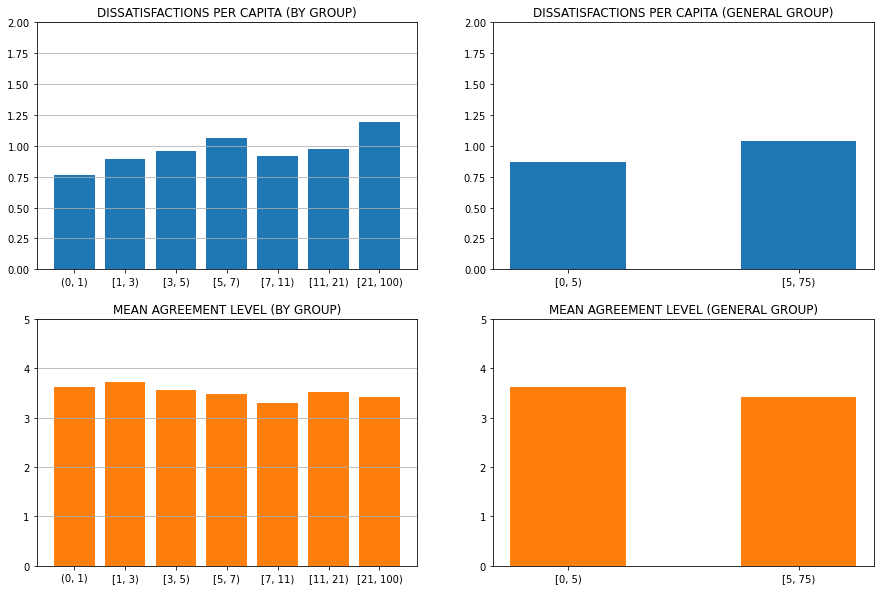

In [64]:
fig =plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('DISSATISFACTIONS PER CAPITA (BY GROUP)')
plt.ylim(0,2) 
ax1.grid(axis='y')
ax1 = plt.bar(resigners_perc_wt[:-1].index.map(str), height=resigners_perc_wt['dissatisfactions'][:-1])

ax2 = fig.add_subplot(2,2,3)
ax2.set_title('MEAN AGREEMENT LEVEL (BY GROUP)')
plt.ylim(0,5)
ax2.grid(axis='y')
ax2 = plt.bar(resigners_perc_wt[:-1].index.map(str), height=resigners_perc_wt['agreement_level'][:-1], color=['#ff7f0e'])

ax3 = fig.add_subplot(2,2,2)
ax3.set_title('DISSATISFACTIONS PER CAPITA (GENERAL GROUP)')
plt.ylim(0,2)
ax3 = plt.bar(general_groups.index.map(str), height=general_groups['dissatisfactions'], width=0.5)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('MEAN AGREEMENT LEVEL (GENERAL GROUP)')
plt.ylim(0,5)
ax4 = plt.bar(general_groups.index.map(str), height=general_groups['agreement_level'], width=0.5, color=['#ff7f0e'])

If we check on the first bar plot on the top left, we can see that the group that pointed more dissatisfactions per capita is the one of those who had more than 20 years of service, with 1.19. The next group with the highest ratio is the one of those who have been working from 5 to less than 7 years, with almost 1.06 dissatisfactions pointed per person. The top 3 is completed by the groups of people with services between 10/20 and 3/5 years, with 0.97 and 0.96 dissatisfactions pointed per person respectively. The group with less dissatisfactions pointed per person, with 0.76, is the one of those whose service lenght was of less than a year.

This means that people with longer services point more dissatisfactions than people with shorter ones, as we can see on the top right plot, where the group of people with more than 5 years of services usually point more than 1 dissatisfaction per capita, while the people with less than 5 years of service point less than 1. 

On the mean agreement level, as we see on the bottom left plot, the group of people who had been working for more than 20 years has the second lowest one, with 3.2, surpassed for a little by the group of people with services of more than 7 and less than 11 years. Just a bit higher than those two (around 3.3) is the group of those who had been working more than 5 years but less than 7. The highest mean agreement level is the one of the group of employees with more than one year of service but less than 3, with a 3.6.

So, people with longer services tend to have lower agreement levels than people with shorter ones, as we see on the bottom right plot.

Then, the takeover of the plots above is that people with longer services point more dissatisfactions and have lowest mean agreements than people with shorter services on institutes.  

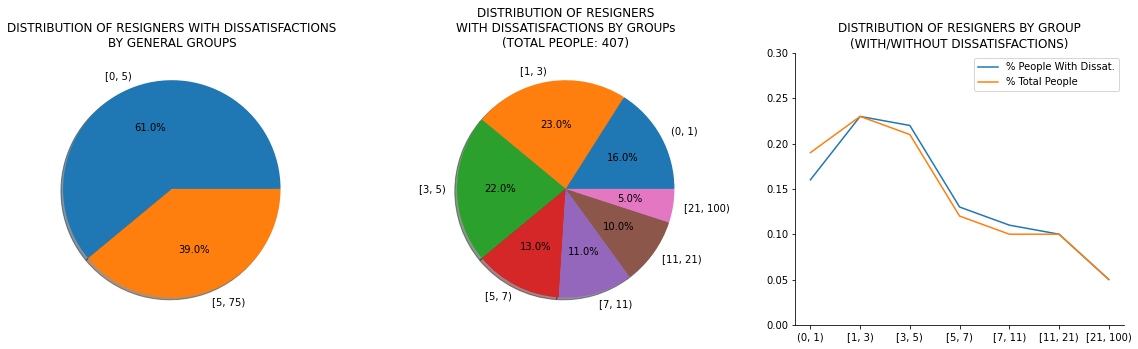

In [65]:
fig = plt.figure(figsize=(20,5))
#fig.suptitle('DISTRIBUTION OF PEOPLE WHO ARGUED DISSATISFACTIONS')

fig.add_subplot(1,3,1)
plt.pie(x=general_groups['%_of_total_dissat.'], labels=general_groups.index.map(str), autopct='%1.1f%%', shadow=True)
plt.title('DISTRIBUTION OF RESIGNERS WITH DISSATISFACTIONS\nBY GENERAL GROUPS')

fig.add_subplot(1,3,2)
plt.pie(x=resigners_perc_wt['%_of_total_dissat.'][:-1], labels=resigners_perc_wt.index.map(str)[:-1], radius=1, autopct='%1.1f%%', shadow=True)
plt.title('DISTRIBUTION OF RESIGNERS\nWITH DISSATISFACTIONS BY GROUPs\n(TOTAL PEOPLE: 407)')

ax = fig.add_subplot(1,3,3)
plt.ylim(0,0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_of_total_dissat.'][:-1], label='% People With Dissat.')
plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_of_total'][:-1], label='% Total People')
plt.title('DISTRIBUTION OF RESIGNERS BY GROUP\n(WITH/WITHOUT DISSATISFACTIONS)')
ax.legend(loc='upper right')

Checking the distribution of the people who resigned arguing any dissatisfaction we can see that 61% of them have worked for the institutes less than 5 years, for the 39% that worked more than 5 years. This means that if we are to choose a person among the ones who argued dissatisfactions when resigning, is more likely that this person belongs to the group of people that served less than 5 years. Remeber also that this group represents the 63% of the total resigners.

As we can see on both the middle and the right plots, the three groups of people with less than 5 years of service are also the top3 greatest in the distribution by groups: people who worked more than 1 year but less than 3 shape the 23%, followed by people whose services were between 3 and less than 5 years, a 22%, a people with less than a year, the 16%. There is also a trend: from 3 years or more of service, the amount of people dissatisfied goes dropping as the years of service increase (blue line of the right plot). This could be explained by the fact that the amount of people who resigned also decreases as the lenght of the service increases (orange line of the right plot).

In order to see if the amount of people who report dissatisfactions when resigning increases or decreases as the lenght of the service increases we need to check, by group, the percentage of people who points dissatisfactions over the total of people who resigned. This information is showed in the column '%_with_dissat_(group)' of our dataframe. 

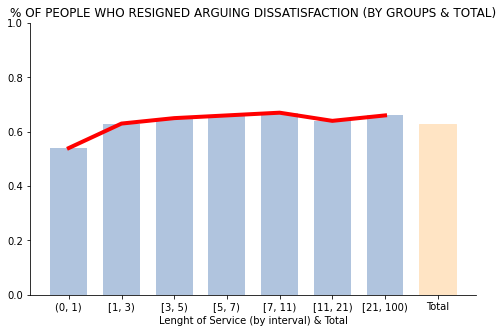

In [66]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot()
ax.set_title('% OF PEOPLE WHO RESIGNED ARGUING DISSATISFACTION (BY GROUPS & TOTAL)')
plt.ylim(0,1)
plt.xlabel('Lenght of Service (by interval) & Total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.bar(resigners_perc_wt.index.map(str), resigners_perc_wt['%_with_dissat_(group)'], width=0.7, color='lightsteelblue')
ax[-1].set_color('bisque')
ax = plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_with_dissat_(group)'][:-1], linewidth=4, color='red')

Although the growth of the line is a bit slight, the red line shows a clear trend: as the length of the service increases, the percentage of people who resigned arguing any dissatisfaction over the total of people who resigned also increases. From the 54% of the group of people who worked less than a year, to the 66% of the group of people who worked more than 20, going through the 67% of people who worked between 7 and less than 11 years as a peak; there is an encrease of more than 10% between the outer groups.

This could be given by the fact that the longer people works in a place, the more likely this people is to see failures or things that go wrong, whilst someone who have been working in a place for less than a year is less likely to realize those very same things. Is clear that more experienced people have a better formed opinion about the places they have been working for, but there is also a high risk for this opinion to also be biased in some ways.

### Answer and takeovers

After vasualize and analize the plots above, we are ready to answer the question 'Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?'.

A quick reply would be assert that of people who worked on institutes for less than 5 years, 61% had argued any dissatisfaction on their resign survey; and of people who worked on institutes for more than 5 years 66% had argued any dissatisfaction on their resign survey.

But this is not the only takeover of our study, as there are some other ideas and behaviours that I would like to point as a summary:

- As I pointed in my answer to the question, there are more people with longer services than with shorter that tend to argue dissatisfactions when resigning from their jobs on institutes.

- People with longer services point more dissatisfactions and have lowest mean agreement levels than people with shorter services on institutes.

- If we are to choose a person among the ones who argued dissatisfactions when resigning, is more likely that this person belongs to the group of people that served less than 5 years (61%).

- As the length of the service increases, the percentage of people who resigned arguing any dissatisfaction over the total of people who resigned also increases.

Let's do the second two questions

### 4.1 Employees by age

As we have done with the first two questions, let's drop first those values where the age is a null value and see what we have left.


In [67]:
resigners_age = resigners.loc[resigners['Age'].notna()]
resigners_age['reason_of_cease'].value_counts()

Resignation    596
Other           47
Termination     36
Transfer        20
Name: reason_of_cease, dtype: int64

We have 699 employees: 596 who had resigned, 36 whose contracts were terminated, 20 who had been transfered and 47 who had other reasons.

First of all, let's do the same dataframe we have done for the first questions, grouping all those employees by intervals of age, adding the count of each group and its percentage above the total, the count of those who pointed any dissatisfaction with its percentage above the total and above the group, the dissatisfactions per capita of each group, and the mean agreement level. Let's also add a row with the totals of each column at the bottom.

In [68]:
resigners_perc = pd.DataFrame(data=resigners_age.groupby('Age').size(), columns=['value_counts'])
resigners_perc['%_of_total'] = round(resigners_age['Age'].value_counts() / resigners_age.shape[0], 3)
resigners_perc['with_dissat.'] = resigners_age['Age'].loc[resigners_age['dissatisfactions'] != 0].value_counts()
resigners_perc['%_of_total_dissat.'] = round(resigners_perc['with_dissat.'] / resigners_perc['with_dissat.'].sum(), 2)
resigners_perc['%_with_dissat_(group)'] = round(resigners_perc['with_dissat.'] / resigners_perc['value_counts'], 2)
resigners_perc = pd.concat([resigners_perc, round(resigners_age.groupby('Age').mean(), 2)], axis=1)

In [69]:
totals_row = {'value_counts': resigners_perc['value_counts'].sum(), 
'%_of_total': resigners_perc['%_of_total'].sum(), 
'with_dissat.': resigners_perc['with_dissat.'].sum(), 
'%_of_total_dissat.': resigners_perc['%_of_total_dissat.'].sum(), 
'%_with_dissat_(group)': round(resigners_perc['with_dissat.'].sum()/resigners_perc['value_counts'].sum(), 2),
'dissatisfactions': resigners_age['dissatisfactions'].sum(), 
'agreement_level': 5}

resigners_perc_total = pd.DataFrame(totals_row, index=['Total'])

resigners_perc_wt = pd.concat([resigners_perc, resigners_perc_total])
resigners_perc_wt

value_counts  %_of_total  with_dissat.  %_of_total_dissat.  \
(0, 20]              12       0.017             6                0.01   
[21, 26)             68       0.097            39                0.09   
[26, 31)             81       0.116            53                0.12   
[31, 36)             67       0.096            43                0.10   
[36, 41)             83       0.119            48                0.11   
[41, 46)            103       0.147            62                0.14   
[46, 51)             92       0.132            54                0.12   
[51, 56)             90       0.129            63                0.14   
[56, 100)           103       0.147            73                0.17   
Total               699       1.000           441                1.00   

           %_with_dissat_(group)  dissatisfactions  agreement_level  
(0, 20]                     0.50              0.58             3.78  
[21, 26)                    0.57              0.79             3.76  
[26, 31)                    0.65              1.05             3.55  
[31, 36)                    0.64              0.90             3.56  
[36, 41)                    0.58              0.93             3.59  
[41, 46)                    0.60              0.79             3.57  
[46, 51)                    0.59              0.90             3.38  
[51, 56)                    0.70              1.10             3.48  
[56, 100)                   0.71              1.04             3.53  
Total                       0.63            653.00             5.00

Let's also divide all those group into a more general division, say young people have less than 41 years and old people have more than 41.

In [70]:
young = pd.DataFrame(resigners_perc_wt.iloc[:5,:].sum()).transpose()
young.iloc[:,4:] = round(young.iloc[:,4:]/5, 2)

old = pd.DataFrame(resigners_perc_wt.iloc[5:9,:].sum()).transpose()
old.iloc[:,4:] = round(old.iloc[:,4:]/4, 2)

general_groups = pd.concat([young,old], ignore_index=True)
general_groups.index = pd.Index([pd.Interval(0,41, closed='left'), pd.Interval(41,100, closed='left')])
general_groups

value_counts  %_of_total  with_dissat.  %_of_total_dissat.  \
[0, 41)           311.0       0.445         189.0                0.43   
[41, 100)         388.0       0.555         252.0                0.57   

           %_with_dissat_(group)  dissatisfactions  agreement_level  
[0, 41)                     0.59              0.85             3.65  
[41, 100)                   0.65              0.96             3.49

As we didi before, let's see how are these two general groups distributed in general (taking resigners who argued and did not argue dissatisfactions) and between people who argued dissatisfactions and people who did not.

([<matplotlib.patches.Wedge at 0x7fcd85d879d0>,
 [Text(-0.49938947630209496, 0.9801072140121811, 'Dissat.'),
  Text(0.49938938453783227, -0.9801072607683943, 'No dissat.')],
 [Text(-0.2723942598011427, 0.5346039349157351, '65.0%'),
  Text(0.27239420974790846, -0.5346039604191241, '35.0%')])

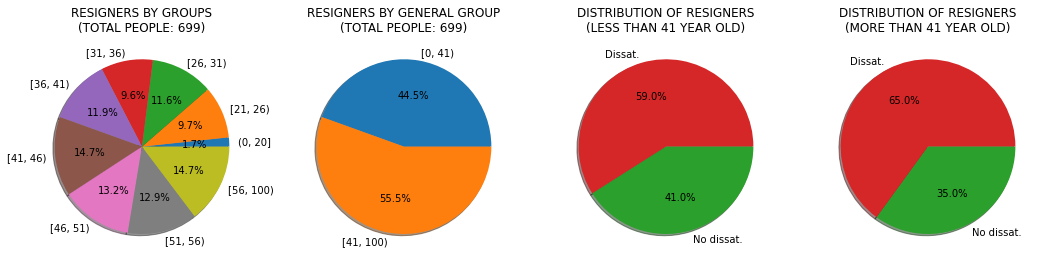

In [71]:
fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(1,4,1)
ax1.set_title('RESIGNERS BY GROUPS\n(TOTAL PEOPLE: 699)')
plt.pie(x=resigners_perc_wt['%_of_total'][:-1], labels=resigners_perc_wt.index.map(str)[:-1], autopct='%1.1f%%', shadow=True)

ax2 = fig.add_subplot(1,4,2)
ax2.set_title('RESIGNERS BY GENERAL GROUP\n(TOTAL PEOPLE: 699)')
plt.pie(x=general_groups['%_of_total'], labels=general_groups.index.map(str), autopct='%1.1f%%', shadow=True)

ax3 = fig.add_subplot(1,4,3)
ax3.set_title('DISTRIBUTION OF RESIGNERS\n(LESS THAN 41 YEAR OLD)')
plt.pie(x=[general_groups['%_with_dissat_(group)'].iloc[0], 1-general_groups['%_with_dissat_(group)'].iloc[0]], labels=['Dissat.', 'No dissat.'], autopct='%1.1f%%', shadow=True, colors=['#d62728', '#2ca02c'])

ax4 = fig.add_subplot(1,4,4)
ax4.set_title('DISTRIBUTION OF RESIGNERS\n(MORE THAN 41 YEAR OLD)')
plt.pie(x=[general_groups['%_with_dissat_(group)'].iloc[1], 1-general_groups['%_with_dissat_(group)'].iloc[1]], labels=['Dissat.', 'No dissat.'], autopct='%1.1f%%', shadow=True, colors=['#d62728', '#2ca02c'])

As we can see, the two most numerous groups are the people between 41 and 46 year old and the people who is more than 56, both representing a 14.7%. Closing the top3 we can find the group of people who is older than 46 but younger than 51, representing 13.2%; and the group of people between 51 and 56, representing 12.9%. The less numerous group is the people of 20 or younger, which represents 1.7%.

Just like that, the distribution of resigners among the general groups is pretty equal: 55.5% of them are older than 41, while 44.5% are younger. 

Checking onto the resigners, by general group of age, 59% of the young people had resigned arguing any dissatisfaction; while 65% of the old people did so. We can say then that nearly 6 out of 10 young people is resigning due to dissatisfactions; and 65% of the old people is also doing it. This could answer the questions related to the age: more people, either young or old, is resigning due to dissatisfactions than people who is resigning without it.

Given that, let's analyze more in depth both dataframes, just to see if we can get any interesting takeovers.

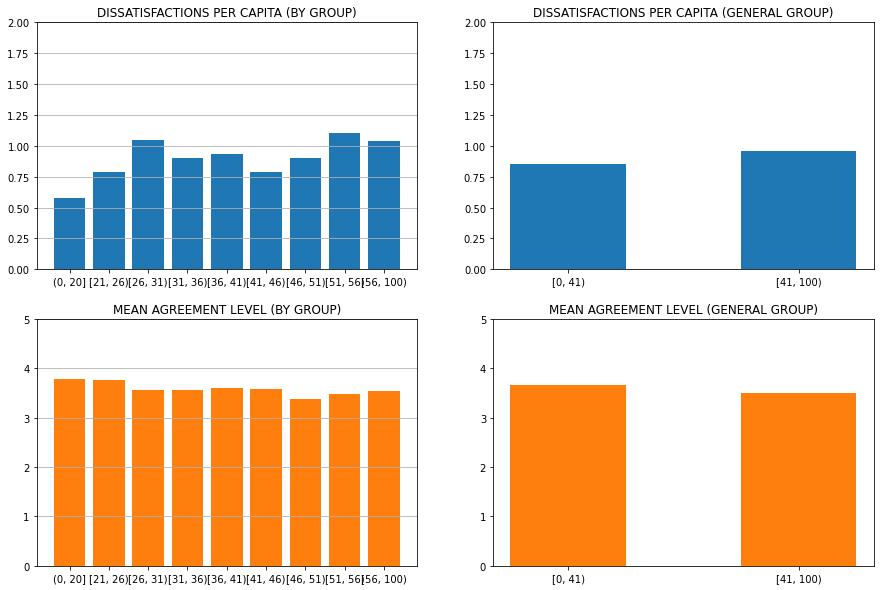

In [72]:
fig =plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('DISSATISFACTIONS PER CAPITA (BY GROUP)')
plt.ylim(0,2) 
ax1.grid(axis='y')
ax1 = plt.bar(resigners_perc_wt[:-1].index.map(str), height=resigners_perc_wt['dissatisfactions'][:-1])

ax2 = fig.add_subplot(2,2,3)
ax2.set_title('MEAN AGREEMENT LEVEL (BY GROUP)')
plt.ylim(0,5)
ax2.grid(axis='y')
ax2 = plt.bar(resigners_perc_wt[:-1].index.map(str), height=resigners_perc_wt['agreement_level'][:-1], color=['#ff7f0e'])

ax3 = fig.add_subplot(2,2,2)
ax3.set_title('DISSATISFACTIONS PER CAPITA (GENERAL GROUP)')
plt.ylim(0,2)
ax3 = plt.bar(general_groups.index.map(str), height=general_groups['dissatisfactions'], width=0.5)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('MEAN AGREEMENT LEVEL (GENERAL GROUP)')
plt.ylim(0,5)
ax4 = plt.bar(general_groups.index.map(str), height=general_groups['agreement_level'], width=0.5, color=['#ff7f0e'])

There are just three groups that argued more than one dissatisfaction per person (top-left plot): people from 56 to 60 had argued 1.1 dissatisfactions per person, people from 26 to 31 pointed 1.05, and people older than 56 pointed 1.04. The group that pointed less dissatisfactions per capita was the ones younger than 20, with 0.58. There's no clear trend, as the line increases up to the people younger than 31, then decreases up to the people younger than 26, and then increase again.

About the general groups, we can say people younger than 41 argue less dissatisfactions per capita than older people, but none of those groups argue more than one (top-right plot).

Where we can see a trend is on the mean agreement level by groups (bottom-left plot): the two highest agreement levels are from the people younger than 20 (3.78) and people between 21 and less than 26 (3.76). Then the levels decrease as the age increases: none of the groups have a mean agreement level greater than 3.6, and even the group of people between 51 and less than 56 goes down to 3.5. 

So, we can say that mean agreement decreases as age increases. This idea is also shown when the groups are generaly divided (bottom-right plot): young people have higher mean agreement than old people, with a difference of 0.16 points. 

Let's see how resigners with dissatisfactions are distributed.

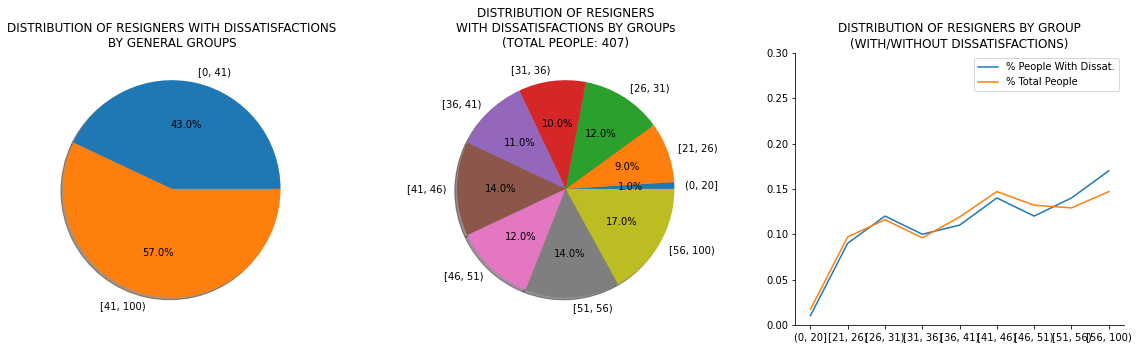

In [75]:
fig = plt.figure(figsize=(20,5))
#fig.suptitle('DISTRIBUTION OF PEOPLE WHO ARGUED DISSATISFACTIONS')

fig.add_subplot(1,3,1)
plt.pie(x=general_groups['%_of_total_dissat.'], labels=general_groups.index.map(str), autopct='%1.1f%%', shadow=True)
plt.title('DISTRIBUTION OF RESIGNERS WITH DISSATISFACTIONS\nBY GENERAL GROUPS')

fig.add_subplot(1,3,2)
plt.pie(x=resigners_perc_wt['%_of_total_dissat.'][:-1], labels=resigners_perc_wt.index.map(str)[:-1], radius=1, autopct='%1.1f%%', shadow=True)
plt.title('DISTRIBUTION OF RESIGNERS\nWITH DISSATISFACTIONS BY GROUPs\n(TOTAL PEOPLE: 407)')

ax = fig.add_subplot(1,3,3)
plt.ylim(0,0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_of_total_dissat.'][:-1], label='% People With Dissat.')
plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_of_total'][:-1], label='% Total People')
plt.title('DISTRIBUTION OF RESIGNERS BY GROUP\n(WITH/WITHOUT DISSATISFACTIONS)')
ax.legend(loc='upper right')

We can see there are a bit more old people among the resigners with dissatisfactions than young people. This means that if we are to choose one person from all those argued dissatisfactions, there is a slightly higher possibility that this person will be older than 41 (left plot).

The group that represents the highest portion of people with dissatisfactions is the people older than 56 (17%), followed by people between 51 and less than 56 and between 41 and less than 46 (14% each), and the people between 46 and less than 51 (12%) (central plot). The group with the smallest portion of people with dissatisfactions is the one of those who are younger than 20.

Given this, we can see a trend: as the age increases, the amount of people with dissatisfactions also increases. This could be explained by the fact that the amount of people who resigned also increases as the age does so (right plot). In order to check this, we need to see, by group, the percentage of people who points dissatisfactions over the total of people who resigned. This information is showed in the column '%with_dissat(group)' of our dataframe. 

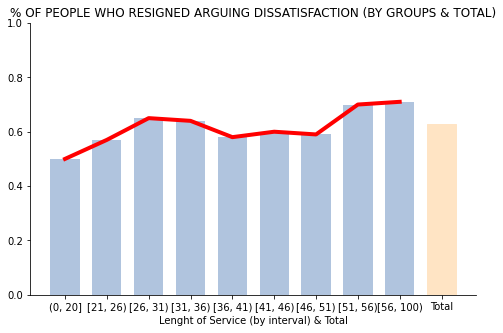

In [76]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot()
ax.set_title('% OF PEOPLE WHO RESIGNED ARGUING DISSATISFACTION (BY GROUPS & TOTAL)')
plt.ylim(0,1)
plt.xlabel('Lenght of Service (by interval) & Total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.bar(resigners_perc_wt.index.map(str), resigners_perc_wt['%_with_dissat_(group)'], width=0.7, color='lightsteelblue')
ax[-1].set_color('bisque')
ax = plt.plot(resigners_perc_wt.index.map(str)[:-1], resigners_perc_wt['%_with_dissat_(group)'][:-1], linewidth=4, color='red')

As the red line shows, the amount of people who resigned arguing any dissatisfaction over the total of people who resigned tends to go up as the age of the people increases. From the 50% of the group of people who is less than 20 years old, to the 71% of the people who is older than 56, there is an increment of 21 points, although this is not constant, as there is a valley between the ages of 36 and 51. In general, 63% of the people who resigned argued any dissatisfaction on their survey.

### Answer and takeovers

As it has been pointed in the beggining of this point, in order to answer the questions 'Are younger employees resigning due to some kind of dissatisfaction? What about older employees?', we can say that few more people, either young or old, is resigning due to dissatisfactions than people who is resigning without pointing any. But there are some other takeovers that we can summarize:

- People younger than 41 argue less dissatisfactions per capita than older people, but none of those groups argue more than one. 

- Mean agreement decreases as age increases; young people have higher mean agreement than old people.

- If we are to choose one person from all those argued dissatisfactions, there is a slightly higher possibility (57%) that this person will be older than 41.

- The amount of people who resigned arguing any dissatisfaction over the total of people who resigned tends to go up as the age of the people increases.